# Distributions of calibrated FUSE parameters and metrics for 10 models
Four FUSE instances. 

# Purpose

1. Identifying parameter bounds for parameter
2. Identifying best parameter set for event modeling based on KGE scores


In [28]:
import glob, os
import xarray as xr
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate

import warnings
warnings.filterwarnings("ignore")

In [29]:
outdir = '/glade/work/manab/ff/1_calib/output/calib100'  # Where the 100 ens * 4 model runs are stored

In [30]:
mod1par = sorted(glob.glob(outdir + '/*_001_para_best*.nc'))
mod2par = sorted(glob.glob(outdir + '/*_002_para_best*.nc'))
mod3par = sorted(glob.glob(outdir + '/*_003_para_best*.nc'))
mod4par = sorted(glob.glob(outdir + '/*_004_para_best*.nc'))
mod5par = sorted(glob.glob(outdir + '/*_005_para_best*.nc'))
mod6par = sorted(glob.glob(outdir + '/*_006_para_best*.nc'))
mod7par = sorted(glob.glob(outdir + '/*_007_para_best*.nc'))
mod8par = sorted(glob.glob(outdir + '/*_008_para_best*.nc'))
mod9par = sorted(glob.glob(outdir + '/*_009_para_best*.nc'))
mod10par = sorted(glob.glob(outdir + '/*_010_para_best*.nc'))

# List of all netCDF variables and long_names

In [43]:
parlist = list(xr.open_dataset(mod1par[0])) #Get a list of all netCDF variables

#Comes from model run logs
mod1parlist = ['RFERR_MLT', 'FRACTEN', 'MAXWATR_1', 'MAXWATR_2', 'QB_PRMS', 'PERCRTE', 'PERCEXP', 
                 'AXV_BEXP', 'TIMEDELAY', 'MBASE', 'MFMAX', 'MFMIN', 'PXTEMP', 'OPG', 'LAPSE']
mod2parlist = ['RFERR_MLT', 'FRACTEN', 'MAXWATR_1', 'MAXWATR_2', 'BASERTE', 'QB_POWR', 'RTFRAC1', 'PERCRTE', 
              'PERCEXP', 'AXV_BEXP', 'TIMEDELAY', 'MBASE', 'MFMAX', 'MFMIN', 'PXTEMP', 'OPG', 'LAPSE']
mod3parlist = ['RFERR_MLT', 'FRACTEN', 'MAXWATR_1', 'PERCFRAC', 'FPRIMQB', 'MAXWATR_2', 'QBRATE_2A',
                 'QBRATE_2B', 'SACPMLT', 'SACPEXP', 'IFLWRTE', 'SAREAMAX', 'TIMEDELAY', 'MBASE', 'MFMAX',
                 'MFMIN', 'PXTEMP', 'OPG', 'LAPSE']
mod4parlist = ['RFERR_MLT','FRCHZNE', 'FRACTEN','MAXWATR_1','FRACLOWZ','MAXWATR_2','QB_PRMS','PERCRTE','PERCEXP',
               'AXV_BEXP','TIMEDELAY','MBASE','MFMAX','MFMIN','PXTEMP','OPG','LAPSE']
mod5parlist = ['RFERR_MLT','FRACTEN','MAXWATR_1','MAXWATR_2','QB_PRMS','PERCRTE','PERCEXP','AXV_BEXP','TIMEDELAY',
               'MBASE','MFMAX','MFMIN','PXTEMP','OPG','LAPSE']
mod6parlist = ['RFERR_MLT','FRCHZNE','FRACTEN','MAXWATR_1','FRACLOWZ','MAXWATR_2','BASERTE','LOGLAMB','TISHAPE','QB_POWR',
               'SACPMLT','SACPEXP','IFLWRTE','SAREAMAX','TIMEDELAY','MBASE','MFMAX','MFMIN','PXTEMP','OPG','LAPSE']
mod7parlist = ['RFERR_MLT','FRACTEN','MAXWATR_1','PERCFRAC','FPRIMQB','MAXWATR_2','QBRATE_2A','QBRATE_2B',
               'SACPMLT','SACPEXP', 'IFLWRTE','SAREAMAX','TIMEDELAY','MBASE','MFMAX','MFMIN','PXTEMP','OPG','LAPSE']
mod8parlist = ['RFERR_MLT','FRACTEN','MAXWATR_1','PERCFRAC','FPRIMQB','MAXWATR_2','QBRATE_2A','QBRATE_2B','PERCRTE',
               'PERCEXP','SAREAMAX','TIMEDELAY','MBASE','MFMAX','MFMIN','PXTEMP','OPG','LAPSE']
mod9parlist = ['RFERR_MLT','FRACTEN','MAXWATR_1','PERCFRAC','FPRIMQB','MAXWATR_2','QBRATE_2A','QBRATE_2B',
               'RTFRAC1','PERCRTE','PERCEXP','SAREAMAX','TIMEDELAY','MBASE','MFMAX','MFMIN','PXTEMP','OPG','LAPSE']
mod10parlist = ['RFERR_MLT','FRACTEN','MAXWATR_1','MAXWATR_2','QB_PRMS','SACPMLT','SACPEXP','IFLWRTE','AXV_BEXP',
                'TIMEDELAY','MBASE','MFMAX','MFMIN','PXTEMP','OPG','LAPSE']

In [32]:
def descExtract(ncdf):
    '''Extracts netCDF variable descriptions 
    
    ncdf: Example netCDF file output from FUSE
    '''
    nctemp = xr.open_dataset(ncdf) #Get a list of all netCDF variables
    pardesclist = []
    for var in nctemp.variables.values():
        
        pardesc = var.attrs.get('long_name')
        pardesclist.append(pardesc)
    return(pardesclist)
    
pardesclist = descExtract(ncdf = mod1par[0])

def parExtract(nclist, parlist):
    '''Extracts a variable from a list of netCDF files
    
    nclist: List of netCDF files
    ncpar: Variable which you want to extract values
    '''
    #ncdat = []
    ncdat = pd.DataFrame([])
    for count, value in enumerate(nclist):
        ncout = xr.open_dataset(value).to_dataframe()
        parval = ncout[parlist]
        ncdat = ncdat.append(parval)
        #
    return(ncdat)

# FUSE - Model 1

        RFERR_MLT     FRACTEN   MAXWATR_1    MAXWATR_2     QB_PRMS  \
count  100.000000  100.000000  100.000000   100.000000  100.000000   
mean     1.000040    0.949099  499.592468  2459.769043    0.002430   
std      0.000044    0.001317    0.515565  1383.055298    0.000189   
min      1.000000    0.939353  496.043701   159.537415    0.001812   
25%      1.000012    0.948994  499.436172  1193.543884    0.002316   
50%      1.000027    0.949362  499.775436  2393.712891    0.002414   
75%      1.000051    0.949722  499.884727  3438.907166    0.002589   
max      1.000242    0.949998  499.996826  4973.623047    0.002804   

          PERCRTE     PERCEXP    AXV_BEXP   TIMEDELAY       MBASE       MFMAX  \
count  100.000000  100.000000  100.000000  100.000000  100.000000  100.000000   
mean   302.412262   11.977701    0.068261    4.632547    0.038011    2.983310   
std    253.348602    4.135209    0.003467    0.349715    0.102107    0.195651   
min     36.649971    5.160930    0.061437    

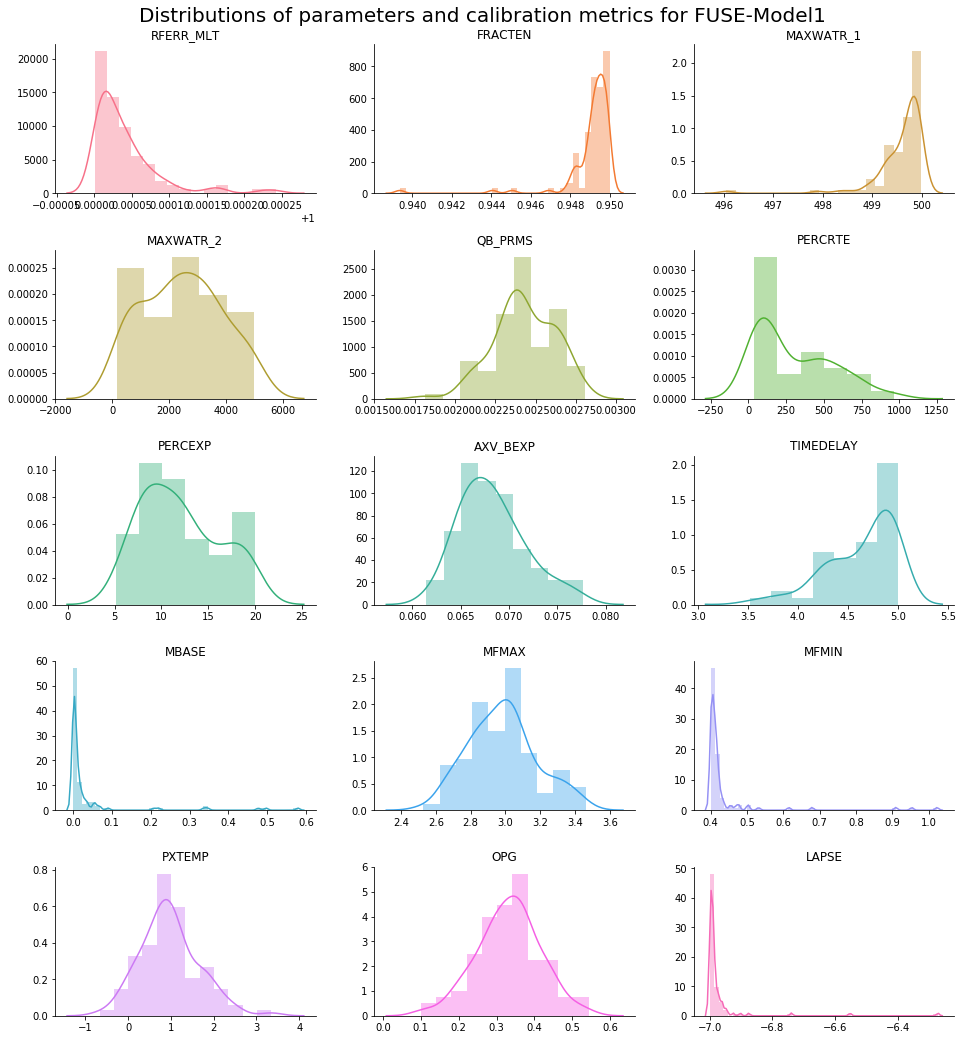

In [33]:
pardat = parExtract(mod1par, mod1parlist) 
parstat= pardat.describe() #Descriptive statistics

pardat = pd.melt(pardat)  #tidy
print(parstat)

#Plot
g = sns.FacetGrid(pardat, col="variable", col_order=mod1parlist, hue='variable', col_wrap=3, sharey = False, sharex=False)
g = (g.map(sns.distplot, 'value').set_ylabels('').set_xlabels(''))

for ax, parname, in zip(g.axes.flat, mod1parlist):
    ax.set_title(parname)
    
g = g.fig.suptitle('Distributions of parameters and calibration metrics for FUSE-Model1', 
                   x=0.75, y=0.96, horizontalalignment='center', verticalalignment='top', fontsize = 20)
plt.tight_layout(rect=[0, 0, 1.5, 0.95])
plt.show()

# FUSE - MODEL 2

        RFERR_MLT     FRACTEN   MAXWATR_1    MAXWATR_2     BASERTE  \
count  100.000000  100.000000  100.000000   100.000000  100.000000   
mean     1.000351    0.075243  451.245026  4744.748535   49.064224   
std      0.000300    0.041067   51.124428   222.563156   29.047831   
min      1.000001    0.050023  301.631287  3839.195068    2.120637   
25%      1.000095    0.051167  414.177795  4659.370972   33.469740   
50%      1.000312    0.056228  470.027512  4790.307617   43.453661   
75%      1.000563    0.082006  495.477844  4887.925293   63.685369   
max      1.000956    0.240053  499.965210  4999.893066  173.234009   

          QB_POWR     RTFRAC1     PERCRTE     PERCEXP    AXV_BEXP   TIMEDELAY  \
count  100.000000  100.000000  100.000000  100.000000  100.000000  100.000000   
mean     5.425796    0.944999  194.712036    5.351506    0.256848    4.421973   
std      1.608841    0.008465  276.675873    3.870917    0.051807    0.451554   
min      1.623092    0.892097    4.694458    

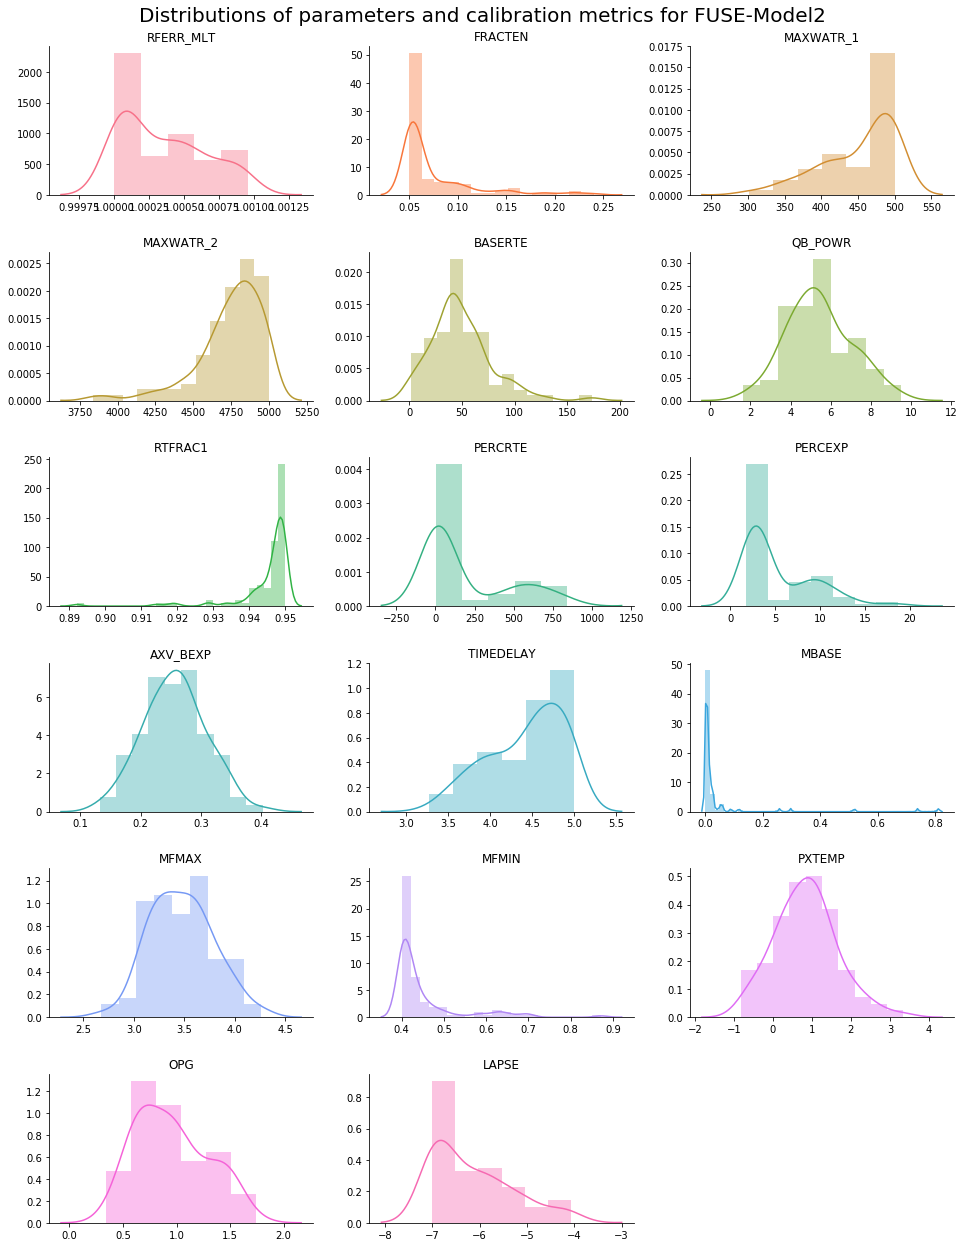

In [34]:
pardat = parExtract(mod2par, mod2parlist) 
parstat= pardat.describe() #Descriptive statistics

pardat = pd.melt(pardat)  #tidy
print(parstat)

#Plot
g = sns.FacetGrid(pardat, col="variable", col_order=mod2parlist, hue='variable', col_wrap=3, sharey = False, sharex=False)
g = (g.map(sns.distplot, 'value').set_ylabels('').set_xlabels(''))

for ax, parname, in zip(g.axes.flat, mod2parlist):
    ax.set_title(parname)
    
g = g.fig.suptitle('Distributions of parameters and calibration metrics for FUSE-Model2', 
                   x=0.75, y=0.96, horizontalalignment='center', verticalalignment='top', fontsize = 20)
plt.tight_layout(rect=[0, 0, 1.5, 0.95])
plt.show()

# FUSE-Model3

        RFERR_MLT     FRACTEN   MAXWATR_1    PERCFRAC     FPRIMQB  \
count  100.000000  100.000000  100.000000  100.000000  100.000000   
mean     1.000508    0.371388  459.568359    0.469212    0.512788   
std      0.000327    0.101991   53.460892    0.207939    0.161114   
min      1.000016    0.160145  189.884460    0.051859    0.160955   
25%      1.000196    0.286966  448.830780    0.315624    0.365876   
50%      1.000552    0.374029  478.498322    0.461540    0.542928   
75%      1.000774    0.443093  494.339607    0.646003    0.633830   
max      1.000987    0.705195  499.992554    0.802018    0.865220   

         MAXWATR_2   QBRATE_2A   QBRATE_2B     SACPMLT     SACPEXP  \
count   100.000000  100.000000  100.000000  100.000000  100.000000   
mean   2597.327881    0.001877    0.001973  234.634415    3.806643   
std     766.809509    0.000359    0.000390   23.076178    1.023874   
min    1186.073364    0.001014    0.001081  138.162872    1.335584   
25%    1927.651733    0.0016

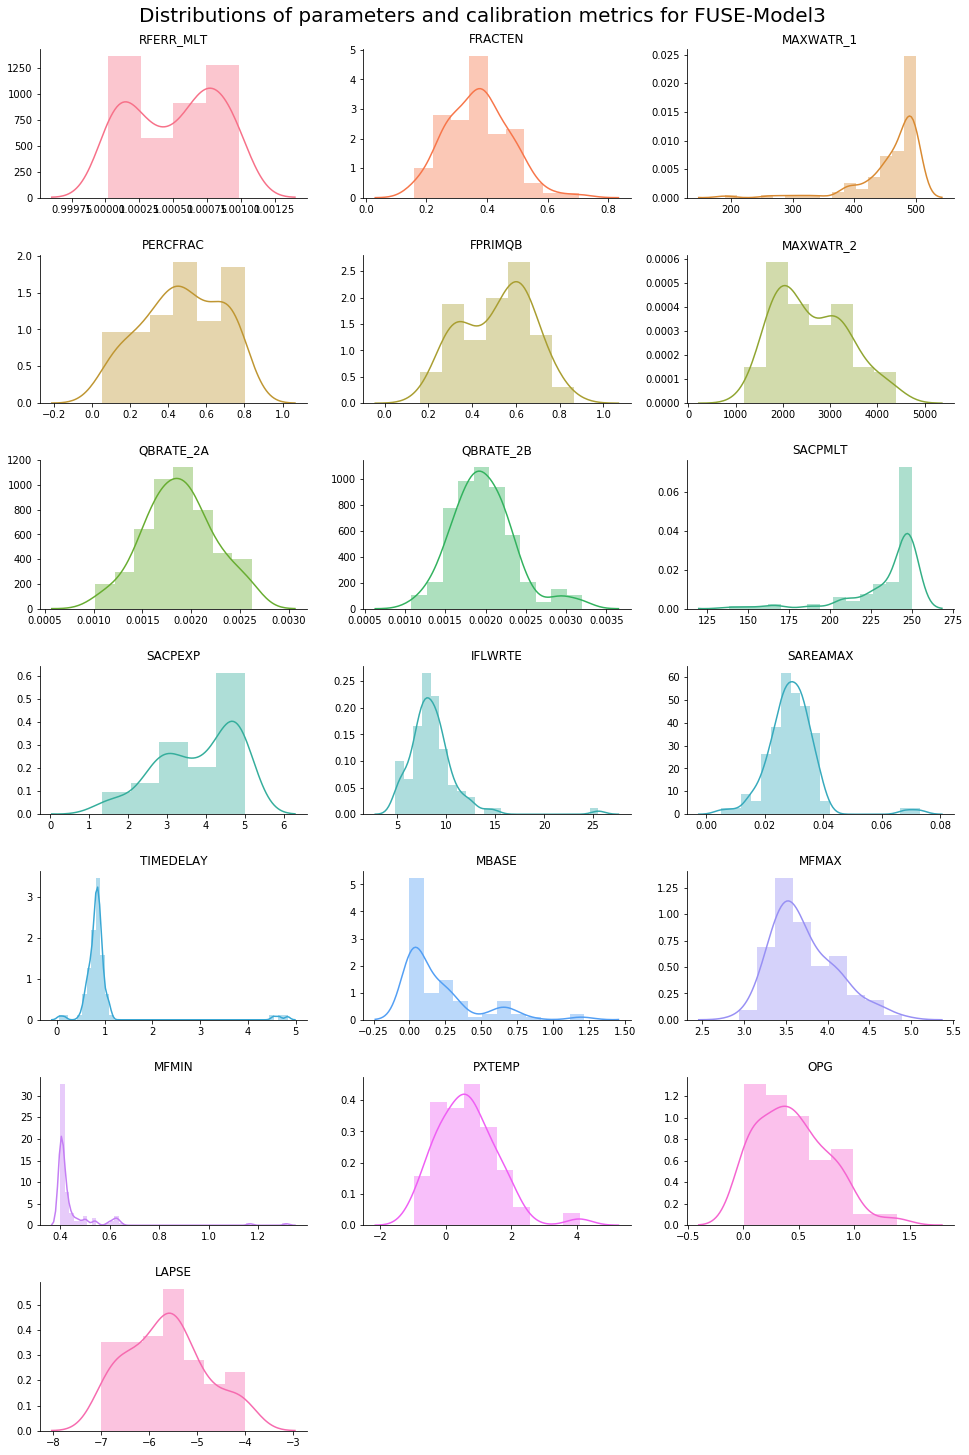

In [35]:
pardat = parExtract(mod3par, mod3parlist) 
parstat= pardat.describe() #Descriptive statistics

pardat = pd.melt(pardat)  #tidy
print(parstat)

#Plot
g = sns.FacetGrid(pardat, col="variable", col_order=mod3parlist, hue='variable', col_wrap=3, sharey = False, sharex=False)
g = (g.map(sns.distplot, 'value').set_ylabels('').set_xlabels(''))

for ax, parname, in zip(g.axes.flat, mod3parlist):
    ax.set_title(parname)
    
g = g.fig.suptitle('Distributions of parameters and calibration metrics for FUSE-Model3', 
                   x=0.75, y=0.96, horizontalalignment='center', verticalalignment='top', fontsize = 20)
plt.tight_layout(rect=[0, 0, 1.5, 0.95])
plt.show()

# FUSE-Model4

        RFERR_MLT     FRCHZNE     FRACTEN   MAXWATR_1    FRACLOWZ  \
count  100.000000  100.000000  100.000000  100.000000  100.000000   
mean     1.000216    0.376072    0.812446  490.500092    0.498910   
std      0.000227    0.122443    0.167852   20.855042    0.230052   
min      1.000001    0.058840    0.457916  344.843750    0.071345   
25%      1.000047    0.296208    0.674507  492.569969    0.325310   
50%      1.000120    0.382854    0.948669  497.674652    0.481992   
75%      1.000302    0.472152    0.949644  499.264626    0.688472   
max      1.000927    0.626952    0.949985  499.934418    0.941685   

         MAXWATR_2     QB_PRMS     PERCRTE     PERCEXP    AXV_BEXP  \
count   100.000000  100.000000  100.000000  100.000000  100.000000   
mean   2373.247070    0.002351  262.557983   11.143926    0.088013   
std    1166.704590    0.000209  253.309845    6.109698    0.037348   
min      95.891899    0.001770    4.665788    1.006767    0.054472   
25%    1566.696960    0.0022

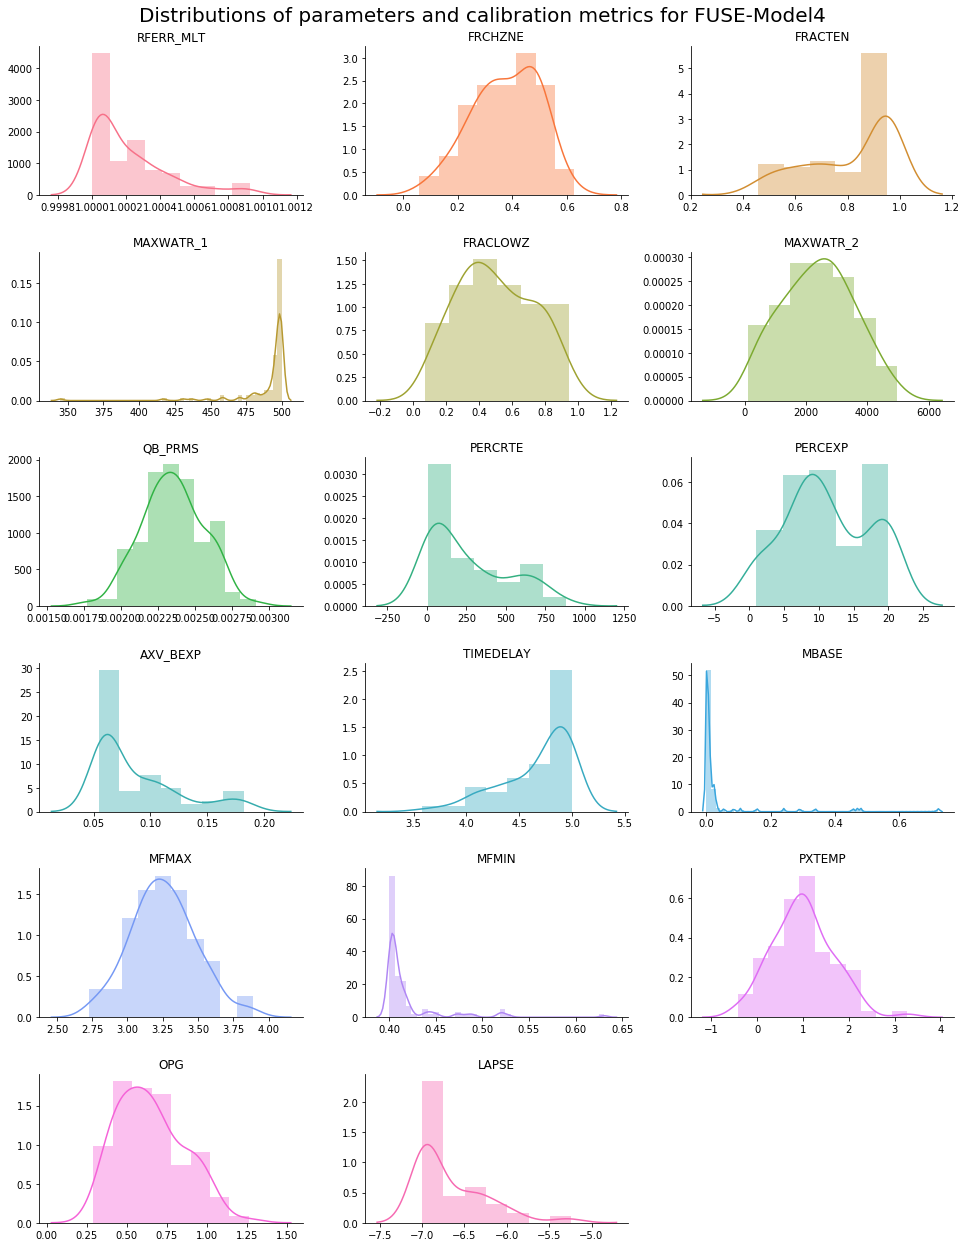

In [38]:
pardat = parExtract(mod4par, mod4parlist) 
parstat= pardat.describe() #Descriptive statistics

pardat = pd.melt(pardat)  #tidy
print(parstat)

#Plot
g = sns.FacetGrid(pardat, col="variable", col_order=mod4parlist, hue='variable', col_wrap=3, sharey = False, sharex=False)
g = (g.map(sns.distplot, 'value').set_ylabels('').set_xlabels(''))

for ax, parname, in zip(g.axes.flat, mod4parlist):
    ax.set_title(parname)
    
g = g.fig.suptitle('Distributions of parameters and calibration metrics for FUSE-Model4', 
                   x=0.75, y=0.96, horizontalalignment='center', verticalalignment='top', fontsize = 20)
plt.tight_layout(rect=[0, 0, 1.5, 0.95])
plt.show()

# FUSE-Model5

        RFERR_MLT     FRACTEN   MAXWATR_1    MAXWATR_2     QB_PRMS  \
count  100.000000  100.000000  100.000000   100.000000  100.000000   
mean     1.000367    0.060436  467.536041  2517.793213    0.002193   
std      0.000276    0.025467   43.548203  1344.297363    0.000184   
min      1.000001    0.050065  330.672211    51.133602    0.001813   
25%      1.000130    0.050698  450.022179  1695.796875    0.002074   
50%      1.000312    0.052829  490.612411  2593.795776    0.002173   
75%      1.000581    0.060335  498.587677  3518.855835    0.002314   
max      1.000973    0.264619  499.977844  4942.025391    0.002677   

          PERCRTE     PERCEXP    AXV_BEXP   TIMEDELAY       MBASE       MFMAX  \
count  100.000000  100.000000  100.000000  100.000000  100.000000  100.000000   
mean   170.362305    4.583116    0.254110    4.500675    0.009270    3.547685   
std    265.259338    3.203057    0.043477    0.427354    0.014630    0.335658   
min      5.307750    1.664575    0.144948    

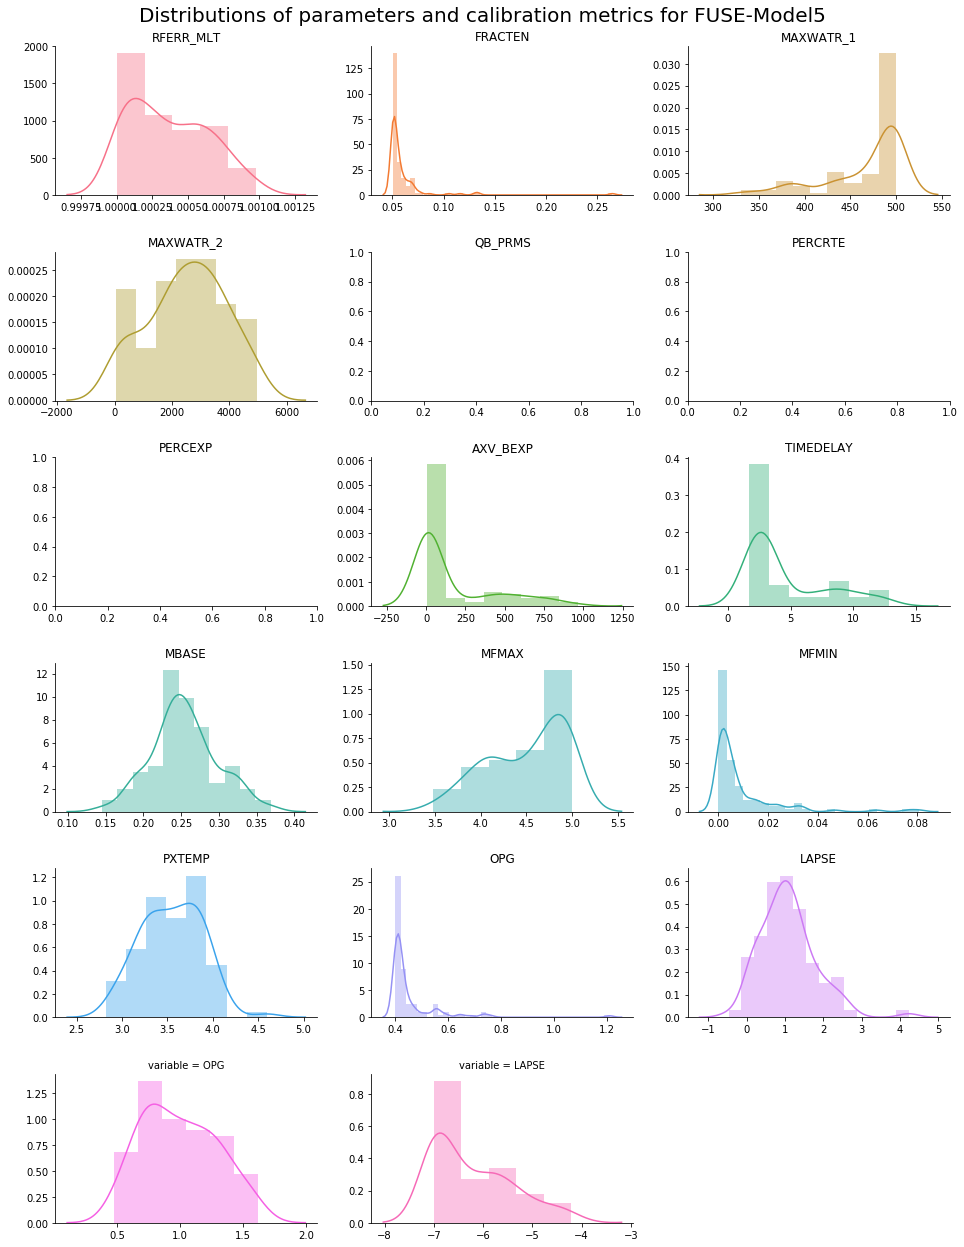

In [39]:
pardat = parExtract(mod5par, mod5parlist) 
parstat= pardat.describe() #Descriptive statistics

pardat = pd.melt(pardat)  #tidy
print(parstat)

#Plot
g = sns.FacetGrid(pardat, col="variable", col_order=mod2parlist, hue='variable', col_wrap=3, sharey = False, sharex=False)
g = (g.map(sns.distplot, 'value').set_ylabels('').set_xlabels(''))

for ax, parname, in zip(g.axes.flat, mod5parlist):
    ax.set_title(parname)
    
g = g.fig.suptitle('Distributions of parameters and calibration metrics for FUSE-Model5', 
                   x=0.75, y=0.96, horizontalalignment='center', verticalalignment='top', fontsize = 20)
plt.tight_layout(rect=[0, 0, 1.5, 0.95])
plt.show()

# FUSE-Model6

        RFERR_MLT     FRCHZNE     FRACTEN   MAXWATR_1    FRACLOWZ  \
count  100.000000  100.000000  100.000000  100.000000  100.000000   
mean     1.000382    0.666809    0.900617  490.440735    0.431883   
std      0.000305    0.129597    0.097235   17.082615    0.248699   
min      1.000003    0.103471    0.526984  407.425293    0.050774   
25%      1.000087    0.606496    0.935470  490.892769    0.207100   
50%      1.000326    0.679652    0.948117  497.136230    0.384605   
75%      1.000635    0.739716    0.949448  499.544914    0.609342   
max      1.000996    0.931975    0.949893  499.985443    0.948694   

         MAXWATR_2     BASERTE     LOGLAMB     TISHAPE     QB_POWR  \
count   100.000000  100.000000  100.000000  100.000000  100.000000   
mean   1925.946289  886.323486    5.093462    4.171249    1.786455   
std     425.218903  111.525299    0.092537    0.635152    0.513305   
min     780.543945  364.353333    5.000759    2.055357    1.005292   
25%    1657.026642  832.7710

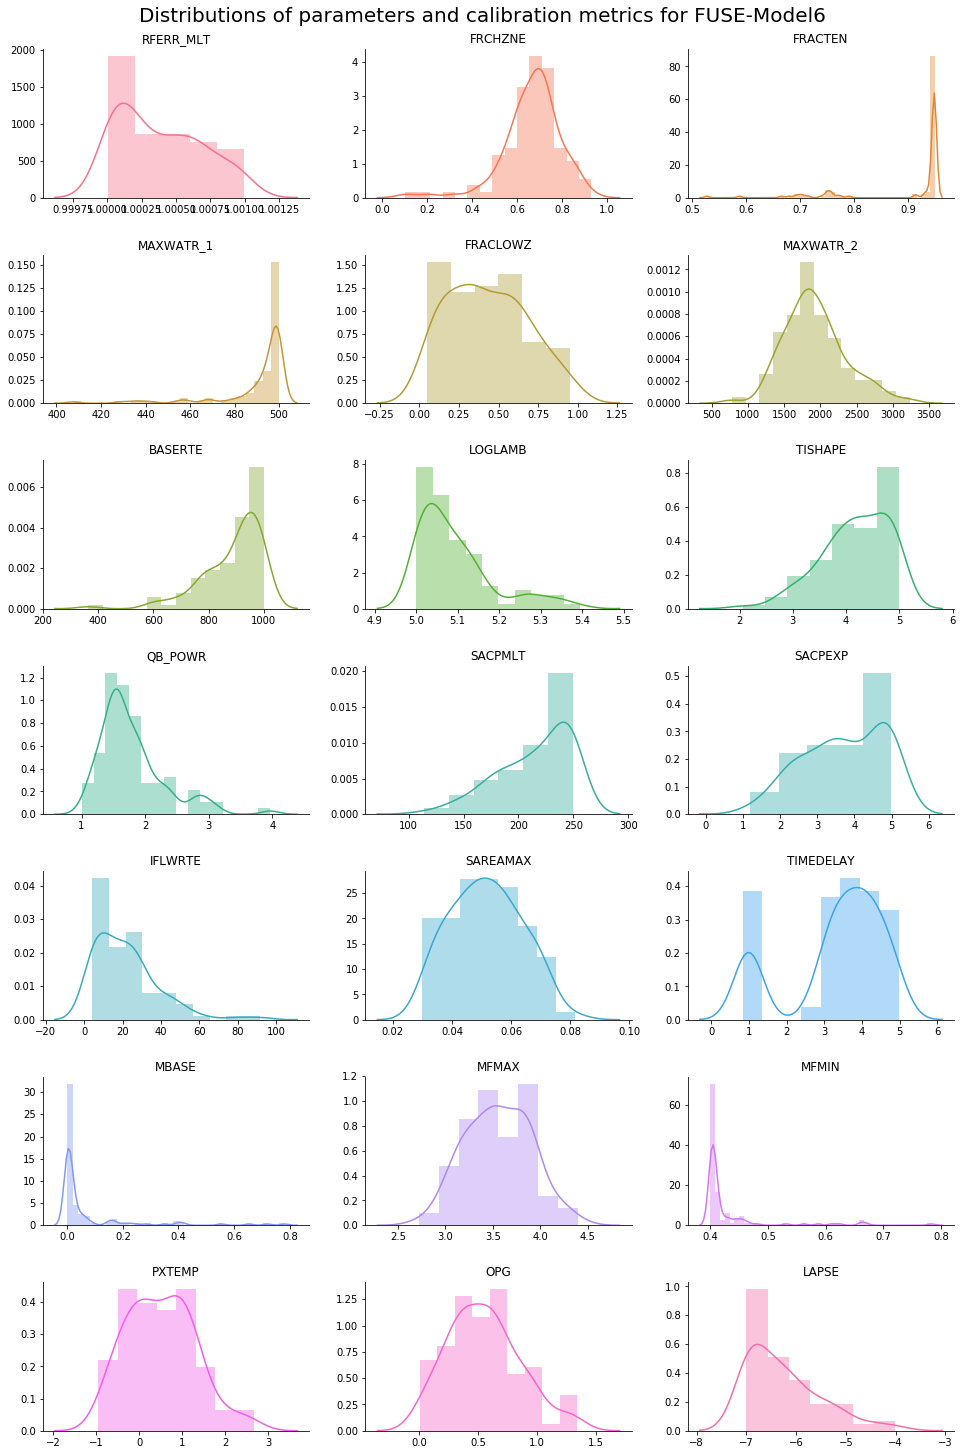

In [40]:
pardat = parExtract(mod6par, mod6parlist) 
parstat= pardat.describe() #Descriptive statistics

pardat = pd.melt(pardat)  #tidy
print(parstat)

#Plot
g = sns.FacetGrid(pardat, col="variable", col_order=mod6parlist, hue='variable', col_wrap=3, sharey = False, sharex=False)
g = (g.map(sns.distplot, 'value').set_ylabels('').set_xlabels(''))

for ax, parname, in zip(g.axes.flat, mod6parlist):
    ax.set_title(parname)
    
g = g.fig.suptitle('Distributions of parameters and calibration metrics for FUSE-Model6', 
                   x=0.75, y=0.96, horizontalalignment='center', verticalalignment='top', fontsize = 20)
plt.tight_layout(rect=[0, 0, 1.5, 0.95])
plt.show()

# FUSE-Model7

        RFERR_MLT     FRACTEN   MAXWATR_1    PERCFRAC     FPRIMQB  \
count  100.000000  100.000000  100.000000  100.000000  100.000000   
mean     1.000500    0.347061  419.743896    0.498119    0.511184   
std      0.000314    0.107236   88.046974    0.242809    0.153523   
min      1.000000    0.135478  158.560425    0.051953    0.215005   
25%      1.000199    0.279566  354.672180    0.314972    0.389770   
50%      1.000510    0.321446  457.805664    0.539025    0.487487   
75%      1.000760    0.425778  488.021118    0.724811    0.654611   
max      1.001000    0.646751  499.806152    0.826244    0.787808   

         MAXWATR_2   QBRATE_2A   QBRATE_2B     SACPMLT     SACPEXP  \
count   100.000000  100.000000  100.000000  100.000000  100.000000   
mean   2410.770996    0.002049    0.001977  226.704041    3.959044   
std     842.614136    0.000506    0.000346   27.388794    1.024684   
min    1071.832764    0.001006    0.001031  106.432877    1.352529   
25%    1777.661072    0.0017

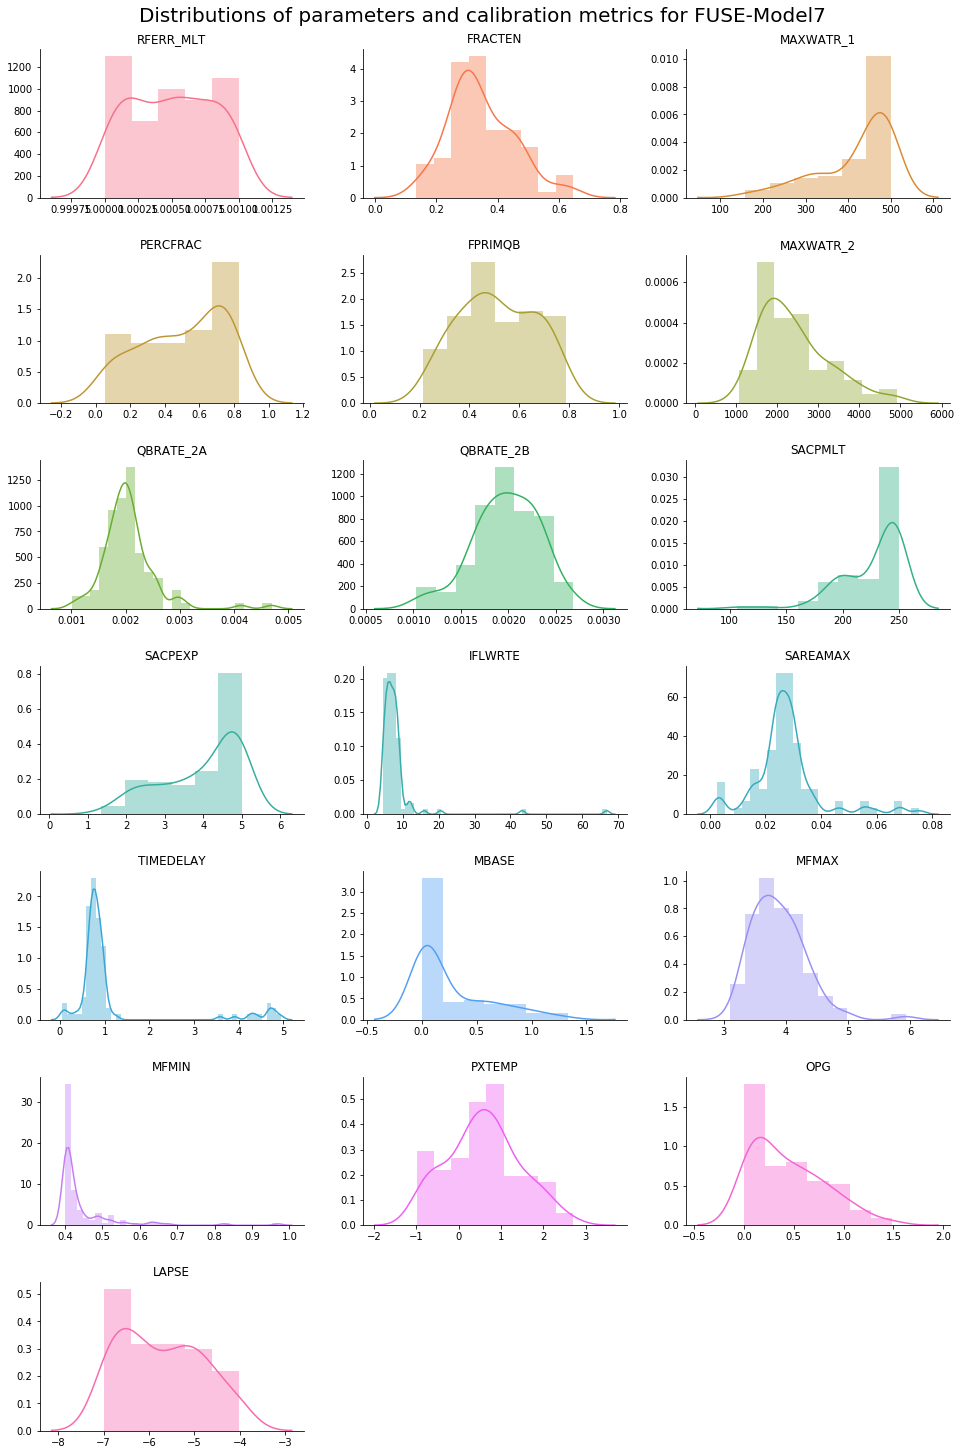

In [41]:
pardat = parExtract(mod7par, mod7parlist) 
parstat= pardat.describe() #Descriptive statistics

pardat = pd.melt(pardat)  #tidy
print(parstat)

#Plot
g = sns.FacetGrid(pardat, col="variable", col_order=mod7parlist, hue='variable', col_wrap=3, sharey = False, sharex=False)
g = (g.map(sns.distplot, 'value').set_ylabels('').set_xlabels(''))

for ax, parname, in zip(g.axes.flat, mod7parlist):
    ax.set_title(parname)
    
g = g.fig.suptitle('Distributions of parameters and calibration metrics for FUSE-Model7', 
                   x=0.75, y=0.96, horizontalalignment='center', verticalalignment='top', fontsize = 20)
plt.tight_layout(rect=[0, 0, 1.5, 0.95])
plt.show()

# FUSE-Model8

        RFERR_MLT     FRACTEN   MAXWATR_1    PERCFRAC     FPRIMQB  \
count  100.000000  100.000000  100.000000  100.000000  100.000000   
mean     1.000446    0.678809  235.662033    0.200438    0.494778   
std      0.000287    0.109282   76.154419    0.153217    0.114920   
min      1.000001    0.202233   25.024071    0.051047    0.171763   
25%      1.000174    0.654837  196.937717    0.078318    0.436506   
50%      1.000423    0.700436  230.878906    0.140778    0.496835   
75%      1.000663    0.744053  265.686386    0.299372    0.556055   
max      1.000998    0.814118  499.777344    0.640158    0.803352   

         MAXWATR_2   QBRATE_2A   QBRATE_2B     PERCRTE     PERCEXP  \
count   100.000000  100.000000  100.000000  100.000000  100.000000   
mean   3426.614746    0.002723    0.003014  551.227295   13.898704   
std     630.211853    0.002257    0.003089  237.909103    4.832686   
min    1966.309326    0.001000    0.001001   25.097349    1.024899   
25%    2938.784912    0.0021

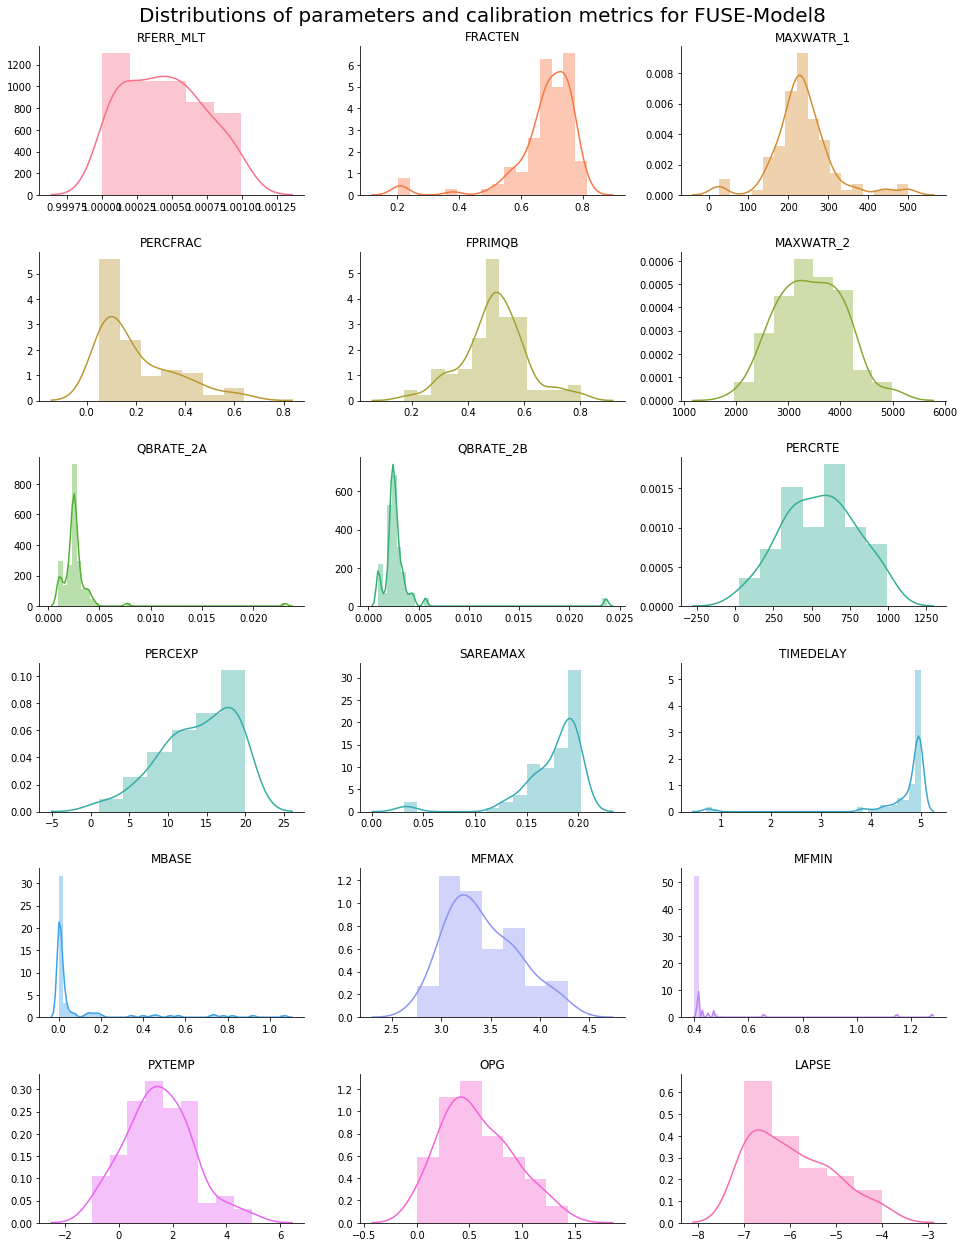

In [44]:
pardat = parExtract(mod8par, mod8parlist) 
parstat= pardat.describe() #Descriptive statistics

pardat = pd.melt(pardat)  #tidy
print(parstat)

#Plot
g = sns.FacetGrid(pardat, col="variable", col_order=mod8parlist, hue='variable', col_wrap=3, sharey = False, sharex=False)
g = (g.map(sns.distplot, 'value').set_ylabels('').set_xlabels(''))

for ax, parname, in zip(g.axes.flat, mod8parlist):
    ax.set_title(parname)
    
g = g.fig.suptitle('Distributions of parameters and calibration metrics for FUSE-Model8', 
                   x=0.75, y=0.96, horizontalalignment='center', verticalalignment='top', fontsize = 20)
plt.tight_layout(rect=[0, 0, 1.5, 0.95])
plt.show()

# FUSE-Model9

        RFERR_MLT     FRACTEN   MAXWATR_1    PERCFRAC     FPRIMQB  \
count  100.000000  100.000000  100.000000  100.000000  100.000000   
mean     1.000244    0.327116  332.009338    0.452085    0.532276   
std      0.000272    0.193592  143.506332    0.144309    0.226764   
min      1.000000    0.050169   25.099802    0.065148    0.062776   
25%      1.000030    0.138284  231.157421    0.397115    0.353135   
50%      1.000118    0.341555  286.365067    0.498488    0.507841   
75%      1.000388    0.481690  498.565933    0.521247    0.707844   
max      1.000994    0.826175  499.986816    0.766850    0.948560   

         MAXWATR_2   QBRATE_2A   QBRATE_2B     RTFRAC1     PERCRTE  \
count   100.000000  100.000000  100.000000  100.000000  100.000000   
mean   4256.834473    0.022464    0.039962    0.504770  366.549805   
std     873.540161    0.061722    0.081813    0.408876  312.849854   
min    1507.625732    0.001000    0.001000    0.050051   15.618597   
25%    3770.515808    0.0018

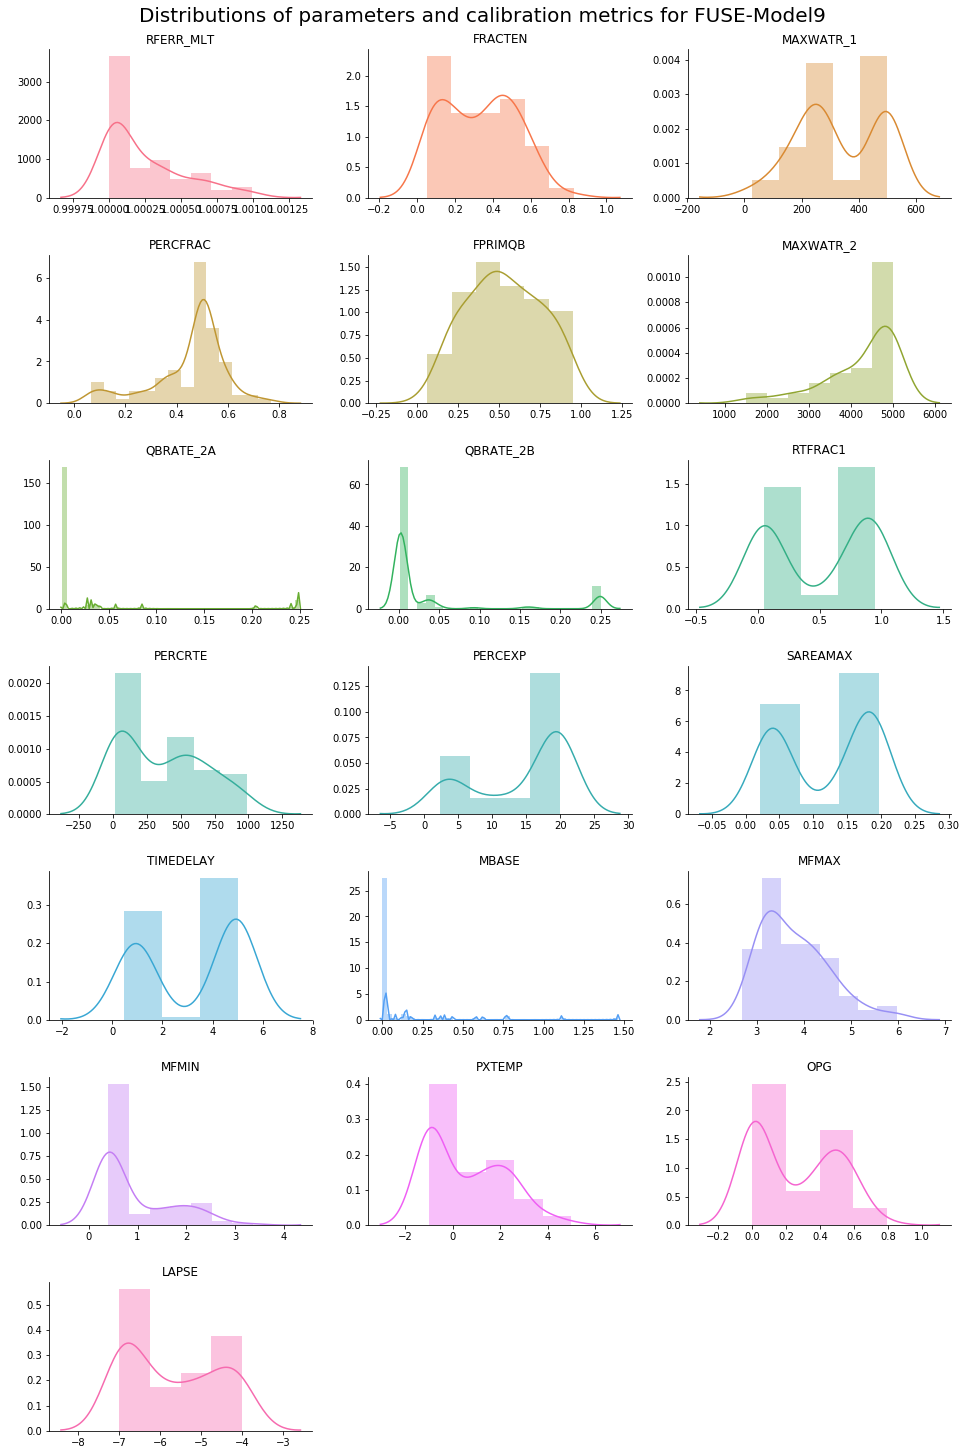

In [45]:
pardat = parExtract(mod9par, mod9parlist) 
parstat= pardat.describe() #Descriptive statistics

pardat = pd.melt(pardat)  #tidy
print(parstat)

#Plot
g = sns.FacetGrid(pardat, col="variable", col_order=mod9parlist, hue='variable', col_wrap=3, sharey = False, sharex=False)
g = (g.map(sns.distplot, 'value').set_ylabels('').set_xlabels(''))

for ax, parname, in zip(g.axes.flat, mod9parlist):
    ax.set_title(parname)
    
g = g.fig.suptitle('Distributions of parameters and calibration metrics for FUSE-Model9', 
                   x=0.75, y=0.96, horizontalalignment='center', verticalalignment='top', fontsize = 20)
plt.tight_layout(rect=[0, 0, 1.5, 0.95])
plt.show()

# FUSE-Model10

        RFERR_MLT     FRACTEN   MAXWATR_1    MAXWATR_2     QB_PRMS  \
count  100.000000  100.000000  100.000000   100.000000  100.000000   
mean     1.000055    0.939912  498.544830  1852.234009    0.002044   
std      0.000090    0.040586    2.246306   463.749207    0.000253   
min      1.000000    0.711668  486.973816   882.158569    0.001179   
25%      1.000010    0.948818  498.255516  1640.133942    0.001882   
50%      1.000022    0.949524  499.538788  1844.810852    0.002045   
75%      1.000050    0.949814  499.857239  2030.066956    0.002228   
max      1.000497    0.949996  500.000000  4248.768555    0.002574   

          SACPMLT     SACPEXP     IFLWRTE    AXV_BEXP   TIMEDELAY       MBASE  \
count  100.000000  100.000000  100.000000  100.000000  100.000000  100.000000   
mean   217.077271    4.575615   39.387527    0.007817    3.678323    0.059828   
std     35.048233    0.708287   29.922108    0.006804    0.909465    0.132914   
min     90.427460    1.665170    4.353444    

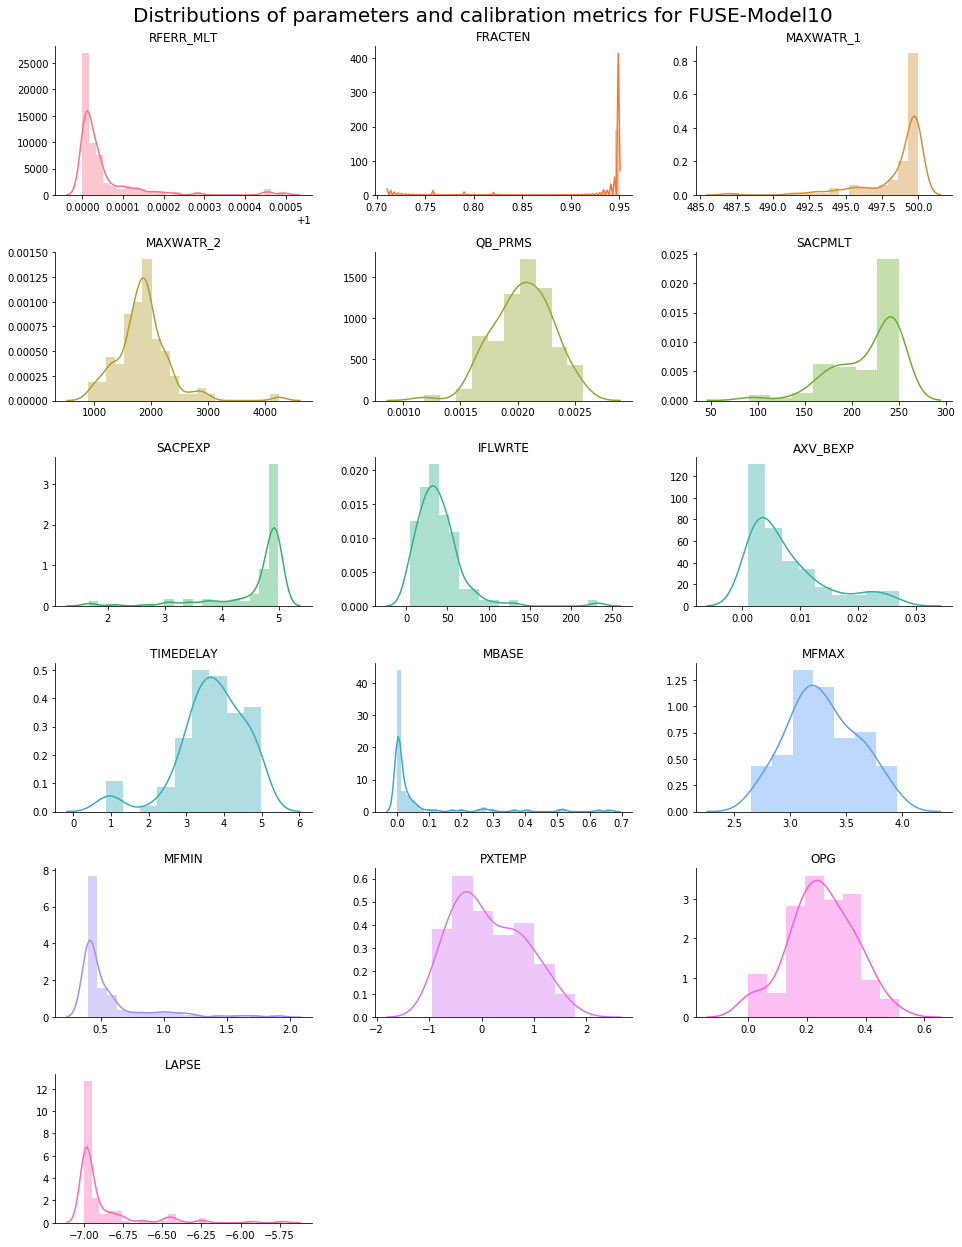

In [46]:
pardat = parExtract(mod10par, mod10parlist) 
parstat= pardat.describe() #Descriptive statistics

pardat = pd.melt(pardat)  #tidy
print(parstat)

#Plot
g = sns.FacetGrid(pardat, col="variable", col_order=mod10parlist, hue='variable', col_wrap=3, sharey = False, sharex=False)
g = (g.map(sns.distplot, 'value').set_ylabels('').set_xlabels(''))

for ax, parname, in zip(g.axes.flat, mod10parlist):
    ax.set_title(parname)
    
g = g.fig.suptitle('Distributions of parameters and calibration metrics for FUSE-Model10', 
                   x=0.75, y=0.96, horizontalalignment='center', verticalalignment='top', fontsize = 20)
plt.tight_layout(rect=[0, 0, 1.5, 0.95])
plt.show()